## Observations and Insights

## Dependencies and starter code

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st 
from scipy.stats import linregress

In [26]:
# import studu data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/study_results.csv"

# Read the mouse data and the study results into a pandas dataframe
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [27]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [28]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


<function matplotlib.pyplot.show(*args, **kw)>

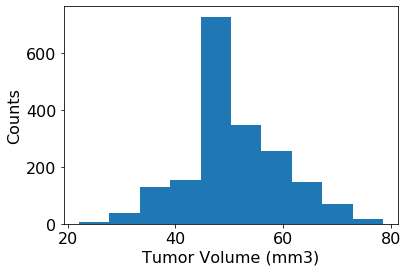

In [29]:
plt.hist(study_results['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show

In [30]:
print(f"Mean of the study results is: {round(study_results['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median of the study results is: {round(study_results['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode of the study results is: {round(study_results['Tumor Volume (mm3)'].mode(),2)}")
print(st.normaltest(study_results['Tumor Volume (mm3)'].sample(100)))

Mean of the study results is: 50.45
Median of the study results is: 48.95
Mode of the study results is: 0    45.0
dtype: float64
NormaltestResult(statistic=6.408886004449879, pvalue=0.040581499148640524)


In [31]:
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_stats = combined_data.groupby('Drug Regimen').agg(\
                                                             Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
                                                             Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
                                                             Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
                                                             Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
                                                             Tumor_Vol_Sem=('Tumor Volume (mm3)', st.sem)\
                                                            ).round(3)

drug_group_stats                                                                                  

/Users/shabeeherizvi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/shabeeherizvi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/shabeeherizvi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_Sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

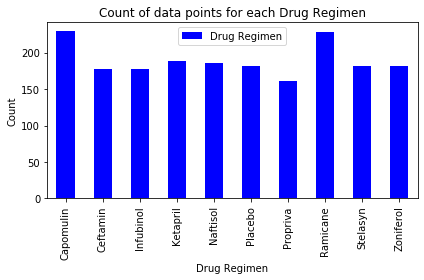

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_group = combined_data.groupby('Drug Regimen')

drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())

count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()



plt.show()

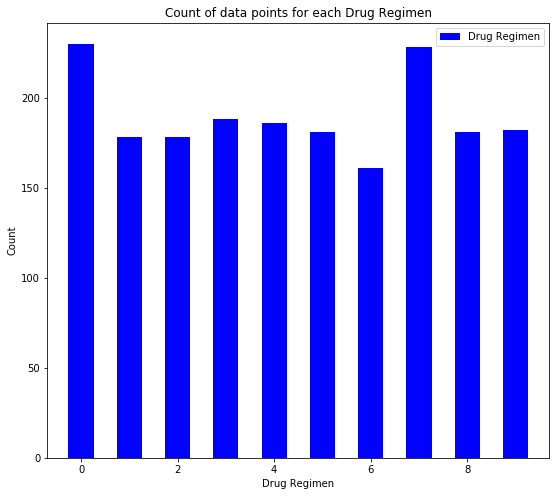

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(drug_group_count))
Locations = [value for value in x_axis]

plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='Blue', align="center", width = 0.52)

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")


plt.show()

## Pie plots

In [12]:
# create a dataframe grouping by the 'Sex' column 
gender_group = combined_data.groupby('Sex')

gender_group_count = pd.DataFrame(gender_group['Sex'].count())

gender_group_count.head()

,Sex
Sex,
Female,935
Male,958


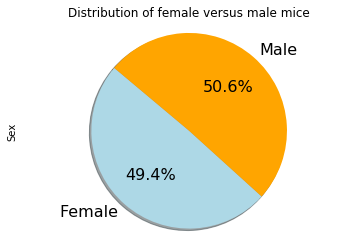

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group_count.plot(kind='pie', y='Sex', 
                       title="Distribution of female versus male mice", startangle=140,
                       autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue", "orange"],legend =False)

plt.axis("equal")
plt.show()

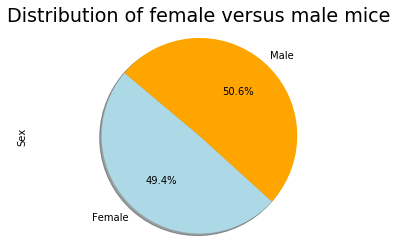

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)

gender_counts = gender_group_count['Sex']

colors =["lightblue", "orange"]

plt.pie(gender_counts, labels=genders, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")

plt.show()

## Quartiles, outliers and boxplots

In [15]:
# list of four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Caftamin']

four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]

four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
four_last_tumor = four_drugs.groupby(['Drug Regimen', 'Mouse ID']).agg(\
                                                                       Last_tumor_size=('Tumor Volume (mm3)', lambda x: x.iloc[-1])).round(3)

four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[75 rows x 1 columns]

In [17]:
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)

four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Infubinol,Ramicane
Mouse ID,,,,
a203,Last_tumor_size,NaN,67.973,NaN
a251,Last_tumor_size,NaN,65.526,NaN
a411,Last_tumor_size,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,43.048
a520,Last_tumor_size,NaN,NaN,38.810


In [43]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
counter = 0
# Do quartile calculations for each drug
for drug in four_drug_list:
    
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
if counter == 0:
        print(f"--------------------------------------------------------------")
        print(f"{drug} IQR data is:")
        print(f"The lower quartile of {drug} is: {lowerq}")
        print(f"The upper quartile of {drug} is: {upperq}")
        print(f"The interquartile range of {drug} is: {iqr}")
        print(f"The median of {drug} is: {quartiles[0.5]}")
        print(f"Values below {lower_bound} for {drug} could be outliners.")
        print(f"Values above {upper_bound} for {drug} could be outliners.")
        print(f"--------------------------------------------------------------")

counter += 1


--------------------------------------------------------------
Caftamin IQR data is:
The lower quartile of Caftamin is: 54.05
The upper quartile of Caftamin is: 65.53
The interquartile range of Caftamin is: 11.48
The median of Caftamin is: 60.16
Values below 36.83 for Caftamin could be outliners.
Values above 82.75 for Caftamin could be outliners.
--------------------------------------------------------------


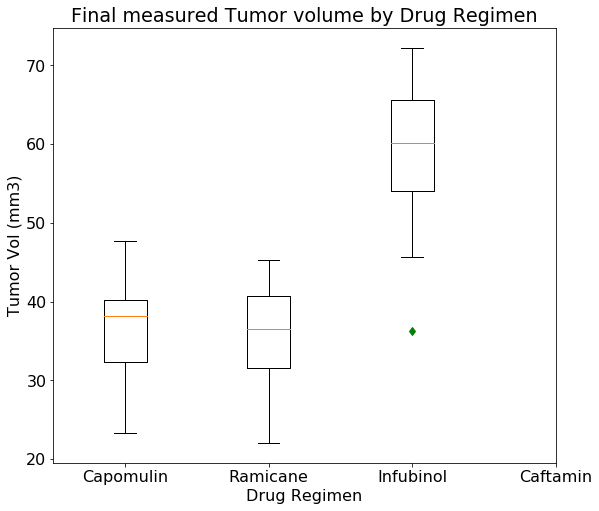

In [45]:
fig1, ax = plt.subplots(figsize=(9,8))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gd')
plt.xticks([1,2,3,4],four_drug_list)


plt.show()

## Line and scatter plots

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [84]:
cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(\
                                                          Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
                                                          Tumor_Vol_SEM=('Tumor Volume (mm3)',st.sem)\
                                                          ).round(3)

cap_time_tumor.head(10)

/Users/shabeeherizvi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/shabeeherizvi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/shabeeherizvi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882
30,38.769,0.934
35,37.817,1.052
40,36.958,1.224


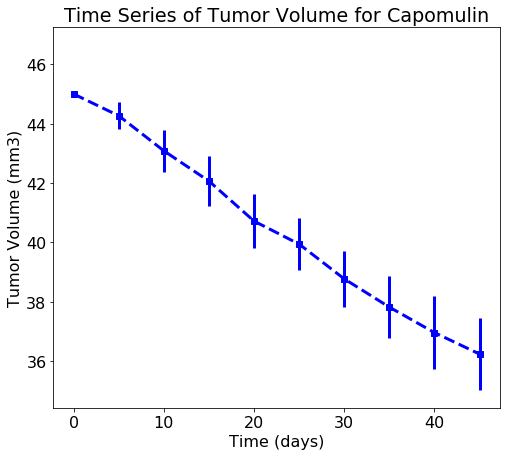

In [66]:
time_series = list(cap_time_tumor.index.values)

plt.errorbar(time_series,cap_time_tumor['Tumor_Vol_Mean'],
             yerr=cap_time_tumor['Tumor_Vol_SEM'],
             label="Time Series of Tumor Volume for Capomulin",
             fmt="bs--",
             linewidth=3)

plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]



plt.show()

In [67]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [86]:
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
                                                        Mouse_weight=('Weight (g)',np.mean),\
                                                        Tumor_vol_mean=('Tumor Volume (mm3)',np.mean)\
                                                        ).round(3)



cap_mouse_id.head(30)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


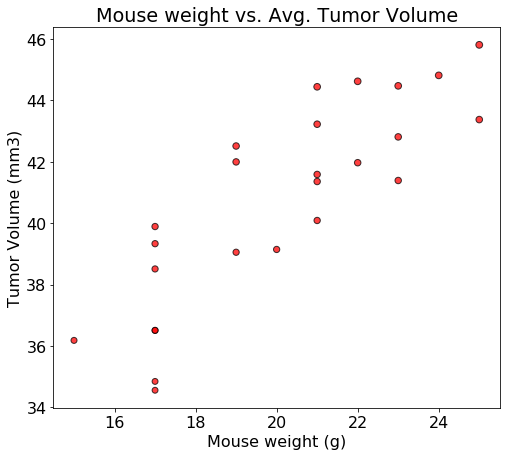

In [87]:
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    
    alpha=.75)

plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [89]:
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419461020261081
The equation of the regressi on line is:y = 0.95x + 21.55


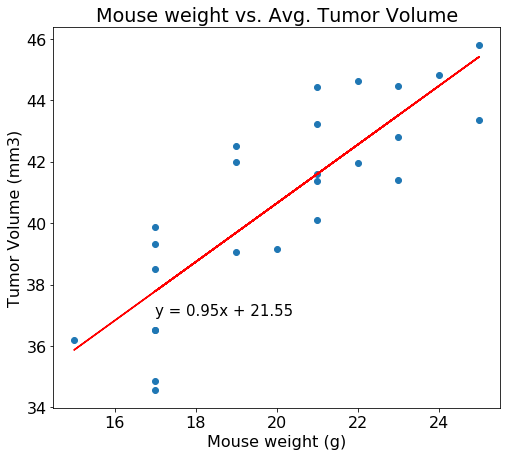

In [114]:
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")


print(f"The r-squared is: {rvalue}")
print(f"The equation of the regressi on line is:{line_eq}")

plt.show()